In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.datasets as dsets
from skimage import transform
import torchvision.transforms as transforms
from torch.autograd import Variable
import pandas as pd;
import numpy as np;
from torch.utils.data import Dataset, DataLoader
# from vis_utils import *
import random
import h5py
import math
import torch.nn.functional as F

In [2]:
# Hyperparameters
num_epochs = 2
num_classes = 10
batch_size = 1
learning_rate = 0.001

DATA_PATH = 'MNIST'
MODEL_STORE_PATH = 'pytorch_model\\'

In [3]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [4]:
# transforms to apply to the data
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [5]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [6]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(16384, 1000)
#         self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 1)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
#         print('shape, before fc1', out.shape)
        out = self.fc1(out)
#         out = self.fc2(out)
        out = F.relu(self.fc2(out))
        return out

In [7]:
model = ConvNet()

# Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()  # this is for regression mean squared loss

In [8]:
# # Train the model
# total_step = len(train_loader)
# loss_list = []
# acc_list = []
# for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         # Run the forward pass
#         print(images.shape)
#         images = Variable(images.float())
#         print(images.shape)
#         print(images.type)
#         labels = Variable(labels)
#         print('labels')
#         print(labels)
#         print(labels.shape)
#         outputs = model(images)
#         loss = loss_func(outputs, labels)
#         loss_list.append(loss.item())

#         # Backprop and perform Adam optimisation
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         # Track the accuracy
#         total = labels.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         correct = (predicted == labels).sum().item()
#         acc_list.append(correct / total)

#         if (i + 1) % 100 == 0:
#             print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
#                   .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
#                           (correct / total) * 100))

In [9]:
# print('Here is the size of the input images:', images.shape)
# print('Here is the size of the outputs:', outputs.shape)

In [10]:
import matplotlib.pyplot as plt
from PIL import Image


# plt.imshow(IMAGE)
# plt.show()

In [11]:
number_brains_train = 100
brains = []
for i in range(1, 1+number_brains_train):
    with h5py.File('../Brains/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        brains += [brain]

# columns = 2
# rows = 5

# fig=plt.figure(figsize=(20, 20))
# for i in range(1, 11):
#     brain = brains[i-1]
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(brain)
# plt.show()


In [12]:
resulting_brains = []
vars_ = []
number_brains_blurried = 10

for l in range(len(brains)):
    test_brain = brains[l]/1000
    resulting_brains.append(test_brain)
    vars_.append(0)
    for i in range(number_brains_blurried):
        var = 0
        changed_brain = np.copy(test_brain)
        for j in range(64):
            for k in range(64):
                value = changed_brain[k][j]
                add = np.random.randint(max(-value, -1000+100*i), 1000-100*i)/1000
                #print(changed_brain[k][j])
                changed_brain[k][j] = value + add
                #print(changed_brain[k][j])

                var = var + add/1000
        resulting_brains.append(changed_brain)
        vars_.append(var)

In [13]:
print(len(vars_))
print(len(resulting_brains))

print((test_brain/1000)[32][32])

1100
1100
0.001454


In [14]:
# labels_ = np.random.randint(1, 10, 10).reshape(10, 1)
# print(np.array(brains).shape)
# brains = np.array(brains).reshape(10, 1, 64, 64)
# print(labels_.shape, brains.shape)
# print(labels_)

vars_ = np.array(vars_).reshape(number_brains_train*(number_brains_blurried+1), 1)
resulting_brains = np.array(resulting_brains).reshape(number_brains_train*(number_brains_blurried+1), 1, 64, 64)

print(vars_.shape[0], vars_.shape)

1100 (1100, 1)


In [15]:
# Train the model
total_step = vars_.shape[0]
loss_list = []
acc_list = []
for epoch in range(num_epochs):
#     for i, (images, labels) in enumerate(train_loader):
#         # Run the forward pass
#         images = Variable(images.float())
#         labels = Variable(labels)
#         outputs = model(images)
    for i in range(vars_.shape[0]):
        images = torch.from_numpy(resulting_brains[i].reshape(1, 1, 64, 64))
        images = Variable(images.float())

        labels = torch.from_numpy(vars_[i])
#         labels = Variable(labels.float())
#         labels = labels.float()
        outputs = model(images)
#         print('Out:', outputs)
#         print('Lab:', labels)
        loss = criterion(outputs, labels.float())
#         print('Loss:', loss)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward(retain_graph=True)
        optimizer.step()

#         # Track the accuracy
#         total = labels.size(0)
#         _, predicted = torch.max(outputs.data, 1)
#         correct = (predicted == labels).sum().item()
#         acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))

Epoch [1/2], Step [100/1100], Loss: 0.3271
Epoch [1/2], Step [200/1100], Loss: 0.3051
Epoch [1/2], Step [300/1100], Loss: 0.0385
Epoch [1/2], Step [400/1100], Loss: 0.1866
Epoch [1/2], Step [500/1100], Loss: 0.0044
Epoch [1/2], Step [600/1100], Loss: 0.0001
Epoch [1/2], Step [700/1100], Loss: 0.0039
Epoch [1/2], Step [800/1100], Loss: 0.0425
Epoch [1/2], Step [900/1100], Loss: 0.0084
Epoch [1/2], Step [1000/1100], Loss: 0.0005
Epoch [1/2], Step [1100/1100], Loss: 0.0612
Epoch [2/2], Step [100/1100], Loss: 0.0512
Epoch [2/2], Step [200/1100], Loss: 0.0388
Epoch [2/2], Step [300/1100], Loss: 0.0013
Epoch [2/2], Step [400/1100], Loss: 0.0012
Epoch [2/2], Step [500/1100], Loss: 0.0009
Epoch [2/2], Step [600/1100], Loss: 0.0000
Epoch [2/2], Step [700/1100], Loss: 0.0008
Epoch [2/2], Step [800/1100], Loss: 0.0123
Epoch [2/2], Step [900/1100], Loss: 0.0001
Epoch [2/2], Step [1000/1100], Loss: 0.0003
Epoch [2/2], Step [1100/1100], Loss: 0.0067


In [16]:
resulting_brains_test = []
vars_test= []

brains_test = []
for i in range(len(brains), len(brains)+10):
    with h5py.File('../Brains/%s.mat' %i, 'r') as f:
#         print(list(f.keys()))
#         print(list(f['cjdata'].keys()))
        brain = np.array(f['cjdata']['image'])
        brain = brain[::8, ::8]
        brains_test += [brain]

for l in range(len(brains_test)):
    test_brain = brains_test[l]/1000
    resulting_brains_test.append(test_brain)
    vars_test.append(0)
    for i in range(10):
        var = 0
        changed_brain = np.copy(test_brain)
        for j in range(64):
            for k in range(64):
                value = changed_brain[k][j]
                add = np.random.randint(max(-value, -1000+100*i), 1000-100*i)/1000
                #print(changed_brain[k][j])
                changed_brain[k][j] = value + add
                #print(changed_brain[k][j])

                var = var + add/1000
        resulting_brains_test.append(changed_brain)
        vars_test.append(var)

In [17]:
# Test the model
model.eval()
with torch.no_grad():
#     for images, labels in test_loader:
   for i in range(len(vars_test)):
        images = torch.from_numpy(resulting_brains_test[i].reshape(1, 1, 64, 64))
        images = Variable(images.float())
        outputs = model(images)
          
        print('OUT', outputs.data[0][0], 'REAL', vars_test[i])

OUT tensor(0.2668) REAL 0
OUT tensor(1.9493) REAL 2.053640999999998
OUT tensor(1.7703) REAL 1.8420339999999957
OUT tensor(1.6037) REAL 1.6211759999999997
OUT tensor(1.3831) REAL 1.4381159999999966
OUT tensor(1.1749) REAL 1.2236780000000016
OUT tensor(1.0170) REAL 1.0197270000000005
OUT tensor(0.8091) REAL 0.8098329999999979
OUT tensor(0.6417) REAL 0.6094880000000008
OUT tensor(0.4830) REAL 0.40679199999999943
OUT tensor(0.3482) REAL 0.2027060000000005
OUT tensor(0.2920) REAL 0
OUT tensor(2.0333) REAL 2.068321000000002
OUT tensor(1.8111) REAL 1.8388190000000033
OUT tensor(1.6441) REAL 1.6619389999999963
OUT tensor(1.3889) REAL 1.4246539999999983
OUT tensor(1.2164) REAL 1.238843
OUT tensor(1.0506) REAL 1.0349760000000048
OUT tensor(0.8340) REAL 0.8021849999999988
OUT tensor(0.6730) REAL 0.6084900000000004
OUT tensor(0.5105) REAL 0.4121059999999983
OUT tensor(0.3789) REAL 0.1994180000000009
OUT tensor(0.3630) REAL 0
OUT tensor(2.0729) REAL 2.050342999999998
OUT tensor(1.8862) REAL 1.87928

In [18]:
test_input = resulting_brains_test[5]
test_input = torch.from_numpy(test_input.reshape(1, 1, 64, 64))
# test_input.requires_grad = True
# print()
test_input = Variable(test_input.float(), requires_grad=True)
test_output = model(test_input)  
test_output.backward(retain_graph=True)
print(test_output)
# test_output = Variable(test_output, requires_grad=True)
# test_output.requires_grad = True
print(test_output)
print(test_input)
d = torch.autograd.grad(test_output, test_input, allow_unused=True)
print(d)

tensor([[1.1749]], grad_fn=<ReluBackward0>)
tensor([[1.1749]], grad_fn=<ReluBackward0>)
tensor([[[[0.2350, 0.1890, 0.0830,  ..., 0.5340, 0.0570, 0.2890],
          [0.4130, 0.2580, 0.1670,  ..., 0.4320, 0.2680, 0.0720],
          [0.3530, 0.3630, 0.4860,  ..., 0.4690, 0.3550, 0.3270],
          ...,
          [0.0650, 0.5620, 0.4700,  ..., 0.4570, 0.4150, 0.3870],
          [0.3030, 0.5040, 0.1560,  ..., 0.1880, 0.0910, 0.3870],
          [0.0190, 0.4260, 0.2920,  ..., 0.4740, 0.0360, 0.2560]]]],
       requires_grad=True)
(tensor([[[[ 6.4013e-04,  2.7508e-04, -4.8014e-04,  ...,  1.3609e-03,
            1.8811e-04,  6.4645e-04],
          [ 1.2718e-03, -8.4212e-04,  1.6317e-03,  ...,  1.4518e-03,
           -2.7447e-04, -3.5466e-04],
          [ 2.7115e-05,  1.1628e-03,  5.2828e-03,  ...,  2.0134e-03,
            1.3794e-03,  1.8130e-03],
          ...,
          [-1.3823e-03,  1.3531e-03,  3.0240e-03,  ...,  3.0661e-03,
            1.7461e-03, -4.1184e-04],
          [ 5.8035e-04,  1.

In [19]:
print(d[0].shape)

torch.Size([1, 1, 64, 64])


In [20]:
# m = nn.Linear(2, 1)
# inputa = torch.ones(1, 2)
# inputa.requires_grad = True
# output = m(inputa).sum()
# output.backward(retain_graph=True)
# print(inputa.grad.data)

# print('INPUT:')
# print(inputa)
# print('OUTPUT:')
# print(output)
# print('LINEAR:')
# print(m)
# print('F(INPUT):', m(inputa))

In [21]:
# print(m.weight)
# print(torch.autograd.grad(output, inputa))

In [22]:
# test_input = resulting_brains_test[0]
# test_input = torch.from_numpy(test_input.reshape(1, 1, 64, 64))
# # test_input.requires_grad = True
# # print()
# test_input = Variable(test_input.float())
# test_output = model(test_input)  
# test_output.backward()
# print(test_output)
# # test_output.requires_grad = True

In [23]:
# print(test_input)

In [24]:
# d = torch.autograd.grad(test_output, test_input)

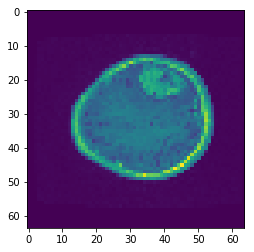

In [25]:
# GRADIENT DESCENT

with h5py.File('../Brains/%s.mat' %i, 'r') as f:
    brain = np.array(f['cjdata']['image'])
    brain = brain[::8, ::8]
    image_to_reconstruct = brain

plt.imshow(image_to_reconstruct)
plt.show()

In [26]:
import scipy.io
mat_90 = scipy.io.loadmat('thinL64_90')
print(mat_90['H'].todense())
print(mat_90['H'].todense().shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(8100, 4096)


In [27]:
A_90 = mat_90['H'].todense()
print(A_90.shape)

(8100, 4096)


In [28]:
p_90 = np.transpose(np.matmul(A_90, image_to_reconstruct.flatten()))

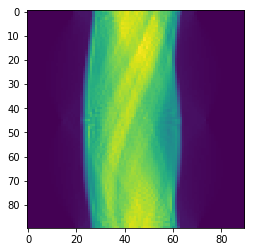

In [29]:
plt.imshow(p_90.reshape(90, 90))    
plt.show()

In [30]:
def f(x):
    global A_90
    p = np.transpose(np.matmul(A_90, np.transpose(x.flatten())))
    return p.reshape(90, 90)

def cost_function(x, y):
    return np.linalg.norm(f(x)-y.reshape(90, 90))
    
def grad_cost_function(x, y):
    global A_90
    U1 = np.matmul(np.transpose(A_90), np.transpose(f(x).flatten()))
#     print(y.flatten().shape)
    U2 = np.matmul(np.transpose(A_90), np.transpose(y.flatten()))
#     return (np.dot(np.transpose(A), f(x)) - np.dot(np.transpose(A), y))
    return U1.reshape(64, 64) - U2.reshape(64, 64)


In [31]:
nn_importance = 1000

def f(x):
    global A_90
    p = np.transpose(np.matmul(A_90, np.transpose(x.flatten())))
    return p.reshape(90, 90)

def cost_function_nn(x, y, nn_importance):
#     global nn_importance
    nn_input = torch.from_numpy((x/1000).reshape(1, 1, 64, 64))
#     print(nn_input.view(1, 1, 64, 64).shape)
    nn_input = Variable(nn_input.float(), requires_grad=True)
    nn_output = model(nn_input.view(1, 1, 64, 64))
#     print('xxx')
#     print(np.linalg.norm(f(x)-y.reshape(90, 90)))
#     print(nn_importance * nn_output[0][0])
#     print('xxx')
    return np.linalg.norm(f(x)-y.reshape(90, 90)) + nn_importance * nn_output[0][0]
    
def grad_cost_function_nn(x, y, nn_importance):
    global A_90
#     global nn_importance
    U1 = np.matmul(np.transpose(A_90), np.transpose(f(x).flatten()))
#     print(y.flatten().shape)
    U2 = np.matmul(np.transpose(A_90), np.transpose(y.flatten()))
#     return (np.dot(np.transpose(A), f(x)) - np.dot(np.transpose(A), y))

    nn_input = torch.from_numpy((x/1000).reshape(1, 1, 64, 64))
    nn_input = Variable(nn_input.float(), requires_grad=True)
    nn_output = model(nn_input.view(1, 1, 64, 64))
    nn_output.backward(retain_graph=True)
    d = torch.autograd.grad(nn_output, nn_input, allow_unused=True)
#     print(d[0].shape)
    if d[0].shape == torch.Size([1, 1, 64, 64]):
        d = d[0][0][0]
    else:
        d = d[0]
    print('classical:')
    print((U1.reshape(64, 64) - U2.reshape(64, 64))[32])
    print('special:')
    print(nn_importance * d.numpy()[32])
    return U1.reshape(64, 64) - U2.reshape(64, 64) + nn_importance * d.numpy()
#     return d.numpy()
    


In [32]:
itr = 101
lr = 0.00001
cur_x_nn = np.random.rand(64, 64)
cur_x = np.random.rand(64, 64)


for i in range(itr+1):
    
    nn_importance = 100000 * i * i
    
    prev_x_nn = cur_x_nn
    prev_x = cur_x
    
    r_nn = grad_cost_function_nn(prev_x_nn, p_90, nn_importance)
    r = grad_cost_function(prev_x, p_90)
#     grad_rec = grad_cost_function(prev_x, p_90)
    
    cur_x = cur_x - lr * r
    cur_x_nn = cur_x_nn - lr * r_nn
    
    
    if i%100 == 0:
        print('___________________________')
        print(cost_function_nn(cur_x_nn, p_90, nn_importance))
        print(cost_function(cur_x, p_90))
        print(i / ( itr - 1 ) * 100, '% done')
        # print(cur_x - original_list[color])

classical:
[[-1136384.82615047 -1367121.80645486 -1367431.51179896 -1394946.60213095
  -1456439.01128558 -1519944.18481511 -1601571.86998944 -1674562.62699762
  -1771952.2965193  -1860015.69725668 -1973307.41071808 -2127236.85411735
  -2368215.80144646 -2629270.45113749 -2839380.86982974 -2886712.05068769
  -2984580.97212277 -2913588.29182095 -3032456.69555752 -3104547.79622629
  -3175748.01251111 -3230214.6666625  -3294614.11205259 -3323610.39744057
  -3381993.2723221  -3452584.71744516 -3501019.40399429 -3532874.11828929
  -3573606.20923416 -3590141.2804679  -3684617.31667892 -3685769.80022441
  -3718800.09189983 -3726074.59210438 -3664690.65544911 -3658910.28542715
  -3641842.33255929 -3651303.57599269 -3618162.20213908 -3591636.50433896
  -3564858.84587336 -3568536.2797479  -3519760.46923096 -3480089.427198
  -3421720.05712925 -3383902.08587275 -3255623.97014825 -3316148.56551073
  -3225378.47537853 -3195551.55196579 -3138812.84134943 -3129133.40396902
  -3097598.47019826 -2922422.

  -1322795.64310588 -1282255.42183659 -1264976.65943503 -1064074.63640026]]
special:
[-1618.96776408  2600.39828718   968.90768036  -846.76705301
   202.90282555 -2909.92930532  1997.9391247  -3688.5432899
  3379.56883013  -703.33667099  -160.76874454   520.84927447
    65.82865026   271.44462802  1565.24013728 -1842.80555695
 -1875.06228685  -810.0554347    760.14939696    -5.50728291
 -1015.34584537   370.01122255 -2116.82766676  -395.36040276
 -3042.9430306   1385.06181538 -2820.96154988  -125.34629786
  -198.65734503  2420.16613483  1491.55929685  -735.95931754
  1834.76451784 -1312.47397512   325.97889658  3786.30794585
 -3804.3782115    579.1534204    925.92649162  -728.74515317
  -914.75378722   533.1018474  -1709.41222459  -837.00865507
  -236.80136073  1610.63279957  1723.63165766  1736.82235181
 -2374.46762621  -452.06667855   614.54256065  1339.27250281
 -1444.32373345  2105.32583296  1442.83436239 -2492.08565801
  1095.1757431    463.7088161   -664.37572241  -507.98216835
 

  -1016089.93548082  -985612.76061695  -970033.40895144  -806457.97338169]]
special:
[ -3483.8154912   10130.40319085   4509.10329819  -1641.44895971
  -2140.0121972   -7142.19510555   2952.70401984 -11297.429353
   8748.18786979  -2641.99990779   8391.95400476   7789.05674815
  -7545.62988877  -5722.60841727   4248.85228276  -5657.14500844
  -8735.01449823  -4843.72228384    440.63492678  -1043.63197461
  -1882.7708438   -4183.88172984   1812.66088039  -1250.48253685
  -6736.51993275  -3874.30153787  -3499.1633147   -2408.26848894
   3662.72330284   2729.32201624  12938.84515762   5300.98862946
   1258.6354278   -7228.72614861   6170.62523961  14999.49246645
  -9922.05291986   6951.79179311   2431.10451847  -4724.16728735
   7937.35682964   2373.19767475  -7828.22594047   3956.15063608
   1254.14021313   4287.55283356   6304.01521921  15025.45326948
   1041.8061167   -4525.71697533   2960.78100801   1356.58197105
  -2936.55656278   2753.50175798   9754.99600172 -13550.85372925
  -4085

   -772231.17750024  -749770.38789351  -735752.67325216  -602345.56732953]]
special:
[-27492.49152839  37479.34810817   2312.07339093  19052.53529549
   1194.08100145 -21079.08166945    499.02750179 -11114.42539841
  30375.31301379   6228.71294618  28143.90622079   8221.38637304
  -9705.23636788 -13975.24606436   8307.33943731   8107.77889565
 -11525.69269761 -20125.3015548   14616.92601442  -2122.82636203
   2277.24176366 -10943.9634718    1866.22068286   6946.68581709
 -17325.6771639   -4062.54041009  -4808.25025588  -7052.83340067
   5604.45394367   5026.5988335   42235.07232964  12533.7632373
   9320.02840564  -2275.62657092 -12850.58073699  23165.14793783
 -17563.70980293   5839.77629431 -14533.04328024  16042.17141867
   6722.90492803    734.73007651   9299.97554049  18575.84472746
   -331.22808672 -16505.12237102   6753.92048433  36611.0432893
    410.82337266  -1025.00156499   8537.53080592   3588.57228421
  -2677.51263455 -10163.21936622  18580.90069145 -28618.83491278
 -17752

   -578890.53425072  -562810.17084929  -550266.95235535  -441274.19424012]]
special:
[-6.13217652e+04  8.08281481e+04  1.20453015e+03  2.74266183e+04
  3.03095430e+04 -3.46761048e+03 -4.25328910e+03 -6.53075650e+03
  4.08223599e+04 -1.62641108e+04  6.30918622e+04  4.50260401e+04
 -1.24389909e+04 -2.15163559e+04  1.45323262e+04  1.04009427e+04
 -1.23669311e+04 -9.01275799e+03  5.48780300e+03  6.23732135e+03
  8.96166712e+03 -2.85796598e+03  2.45774329e+04 -9.91732627e+02
 -1.88172281e+04  1.36539921e+04  7.21805021e+03 -1.48133799e+04
 -2.85984483e+01 -8.50131884e+03  5.92909873e+04  1.71130940e+04
  5.58759458e+03 -5.83578534e+03 -7.96439499e+03  3.67226213e+04
  1.20391427e+03 -9.42691490e+03 -3.37688059e+04  2.26719171e+04
  4.03536335e+03  6.32311404e+03 -1.12801418e+03  2.70351946e+04
 -8.12399462e+03 -1.83232263e+04  1.38851702e+03  2.13143468e+04
  2.01974615e+04 -2.52875775e+04  2.55900443e+04 -9.93134379e+03
  1.05939182e+03 -1.37670234e+04  2.14733616e+04 -3.02940041e+04
 -4.5

   -426229.85479554  -415228.77505508  -404022.53020686  -314838.27228327]]
special:
[-88087.07818389  45113.23291808  52239.31279033  15561.69008836
  82852.75660455  15034.2239067  -25216.97198972 -12145.14719322
  66059.67879295 -35927.64260247 133571.59681618  40325.90426505
 -29420.63612863 -41761.5333572  -18880.46623208    706.9480489
 -13470.70094198   6924.76751283   5015.27101733 -17842.28370525
  17165.08995742  12915.58262892  18957.22816698  20611.63075268
 -11653.28081697  40863.53816092    764.69092164   3855.56137189
 -28033.26118737    645.30817326  58418.09790581  74701.923877
  13511.97366603   3251.98634528 -12403.46115083  51608.84931684
 -33142.51778647  26413.36526722 -25039.30591047 -16832.84761384
  -3123.81976983   6519.12647299   8478.36025059 -16795.62497884
   1766.29109774   6126.67878158 -22060.79661846  41883.1827119
  82931.31366372 -22140.04285634  71686.86017394   4979.72592711
   3415.50039593 -23522.49342948  52811.9597584  -50821.20653242
 -58192.8

   -306213.33758318  -299319.03619426  -289307.11058994  -216204.48704918]]
special:
[-11311.30624563  68404.03452516 114124.11779165  47121.94651365
  85587.70045638  62489.26743865  -9706.82892948 -27238.11417818
  67438.74773383 -33134.18962061 151726.48876905  61060.89055538
  -7155.30719608 -80894.71310377 -66633.6491704   23522.40476757
 -11884.10287723 -41096.57853842   4011.00302115 -21899.57443625
  22554.88671362  62487.46365309  75780.21660447  19616.70778692
 -29342.48484671  30571.000278   -15114.39364403   3482.17450082
  31502.45435536  -1154.33894098  69969.19065714  58419.73274946
  19752.91036069 -22895.96311748 -23624.18621778  43972.09435701
 -16271.36785537  -8558.15950781 -25579.86360043   9074.95245337
 -50261.79067791   7470.56985274  26100.80223531  27951.47616416
   -378.39850411  -4511.00198552 -28782.13785589  46905.99516034
  74394.51366663 -14921.39361799  19365.47532678 -37549.93379116
  -8055.03576994 -82740.32101035  46457.85503089 -94716.27026796
 -617

   -212516.71222137  -208942.63590762  -200056.75101233  -140038.38458247]]
special:
[-2.26967743e+04  9.41088365e+04  1.00073662e+05  7.34490197e+04
  1.54404344e+05  6.30698577e+04 -2.48229387e+03  1.36228795e+03
  2.02762581e+05  7.33905341e+03  1.53911653e+05  1.13450948e+05
 -1.87563377e+04 -8.79653603e+04 -1.08566139e+04 -2.24796416e+04
 -1.57333980e+04 -8.38789551e+04  3.47753674e+04  5.19790299e+04
  7.90434271e+04  4.64210482e+04  2.43369623e+04  6.45229885e+04
 -2.93117311e+04  5.33130631e+04  2.82028829e+04 -2.64162962e+04
 -2.35058247e+04 -4.17135807e+04  3.63766722e+04  5.71939474e+04
  4.41608019e+01 -5.69691047e+04  2.28135880e+04  7.62739511e+04
  2.48173211e+04  9.54297839e+03  3.87406761e+03 -3.87930124e+04
 -8.13074976e+04 -3.70852621e+03 -3.65565601e+02  2.28637840e+04
  8.48435745e+04  6.24148214e+03 -6.44221539e+04  5.20834378e+03
  4.14978558e+04 -2.28397459e+04 -1.17969009e+04 -1.09196032e+05
  3.30658397e+01 -3.93943559e+04  7.76071994e+04 -1.45107950e+05
 -7.8

   -140099.99410324  -139024.85119132  -131211.70620643   -81964.88898487]]
special:
[ -31351.39346123  125561.94067001   76293.67113113   -2447.80480862
  104124.34339523  189075.98257065  -54175.06694794 -117033.00476074
  238088.0355835   -12212.81290054  192817.58069992  124050.1999855
  -37493.9262867  -122425.18663406   27868.94142628   23019.5954442
  -79215.93785286 -106128.27539444   18731.89806938  -22021.92097902
   62960.47568321   53662.7471447    14259.08356905   74283.42103958
   13235.41104794  111894.6313858    14648.61780405  113785.48145294
  -83352.60152817   -7748.9554882    73537.44506836  144634.33027267
   34470.61181068   24007.71230459  -45718.33610535   63665.59267044
  -17513.00990582    1145.45673132   43974.76017475   36106.6788435
 -196768.73683929   66356.84370995  -52625.83494186   45544.74055767
   88490.74840546   32593.41716766   46972.66221046   28565.68098068
  -63762.33100891  -86663.00773621   18082.64255524 -106567.71659851
  115766.59679413   1

   -84747.55660146  -85586.48936778  -78790.8889723   -38406.372891  ]]
special:
[  89283.46261382  149503.77568603  198169.06694323  -42437.53384799
  124745.4081662   356443.66107881 -146301.22818053 -219433.04333836
  306651.80683136   60417.49063879  202350.04909337  104410.13071686
  -43040.76684639 -166924.47178066   29660.68892274   72627.78952718
  -21475.15132092 -165562.0470643    63518.66573095  -19294.75427605
   21336.85243316   66007.27625191    8778.11227692   69056.16587028
   43384.37165134  148448.12359661  145790.51882029   -8968.85788534
  -96910.02806649  -76828.03831995  -13415.82569294     419.58696675
  -39703.17179337   73348.59883413   41102.38342546   51147.5876905
  147351.55440867   43122.06543982  -90931.7638725    47511.33327372
  -50642.07972027   73326.11102611    5408.54791179   70375.68194792
  -54619.33258921  -19512.04149518   -4562.88921414  128020.5488205
   55012.7598457  -131519.50389147   66337.44947612  -35084.68447253
  165211.23424172  -7782

  -4.31572128e+04 -4.54674150e+04 -3.98371867e+04 -6.69529426e+03]]
special:
[ -79619.37226355   -9491.17704295  214364.47277665   -2052.14251764
  138320.88559866  200100.41072965 -168529.00385857   -4652.32878923
  326932.63143301  120508.93157721  264650.91854334  189831.44313097
  -68139.33607191 -193102.32251883   48536.98424995   57433.81567299
 -106377.47123837 -197113.69648576   -8158.66980702  105273.1461823
 -108428.64401639   85843.82943809  -26972.45683521  -15359.84454677
   42366.81386828  107165.90099037  -61234.88303274   36754.65006381
  -58216.42931551   64239.166677    -32123.61596525   55614.88680542
   31747.34301865  -12201.55507326    4785.99744383  -30545.00324652
  172836.59428358  107833.15636218 -119078.85782421  132237.18851805
  -18714.36601505  158984.30719972   94693.19134951  -47434.97818708
 -118258.04598629 -159608.33057761   32729.05945778  -54584.41562951
  -37538.71424124  -88168.92281175   38317.68874079   46681.39386922
   92678.76856029 -177579.4

   -12730.66638503  -15991.18242074  -11386.0787915    15632.00934961]]
special:
[ -15015.92698041  104694.91044059  171133.0877617   306162.65591234
  123289.27274793  291405.89628369  -52929.17243205   44868.14176198
  394665.59775174  171809.68998     353802.47943103  247193.15692782
  -19470.03991809 -242593.46537292    5837.38166606  116714.60950747
  -23277.05288772 -319747.59697914  -59800.94294064   64088.30280416
 -118032.77861327 -202433.51031095  233135.66148281   88846.03227489
  210437.16203421  323951.02530718 -137441.3151294   118612.86181957
  201875.67211688   29646.51603252  134659.43774208  498885.48590243
   13348.61880168 -218705.70294559   19191.00531377  136969.27912533
   20449.25994705   83431.98057264 -269980.27581722  140568.71142238
   81147.8832271   132871.50897086   80693.88326257  -67367.89261922
   85130.83914295  -56598.10067154   15032.27830399   66879.73067164
  -32370.94967626 -247305.44127524   41151.44703537 -169225.40329397
   58350.84761493 -153

     8702.19825535    4719.90623566    8282.67241639   30301.4899744 ]]
special:
[-135304.9993515    55249.26111102   54067.11436808   55681.17722869
  -11046.20089754  428083.29463005  104648.30249548 -144501.81126595
  486413.3477211   335673.06697369  475231.16469383  463581.36534691
 -154045.62056065 -114350.64375401    -742.65506119  176146.32546902
 -113675.06235838 -318803.12561989  -21161.06506437    9192.71484017
  -35356.33943975    1661.12557054  118584.08153057    1375.83492324
  227041.00012779  -13914.57617283   96667.06100106   -6849.12968427
   73126.1909008  -146368.52145195  290487.09869385  376973.61409664
 -117177.32995749  -13332.50328898  103342.58973598  310830.71529865
  -95395.19771934  102827.24350691  -41631.60212338  105746.90178037
  -14505.09298593   92252.73504853 -113810.83577871  123794.28595304
  199144.55115795  -47347.86227345  208127.79217958   96227.42682695
 -111993.29048395  -45247.33051658    4772.17957377   -1086.7908597
   16514.28043842 -1957

    23045.58315418   18567.52950359   21222.11364724   39087.55887106]]
special:
[-103344.29084323   32598.99661643  439145.09452879  299779.6844691
   13348.12495625  354413.71221095   56315.50201215  164252.85041332
  348535.85138917  173006.93606958  529382.3223561   577513.95180821
   33348.58519956 -233403.12466025  -89892.49668084  267010.85828245
 -204132.11751729 -280120.73077261  -43407.33324643  300263.38621974
 -131649.4920291   110784.08556059  347224.51157868   74283.05777721
  319838.60656619  111232.95612633  -25119.27313171 -202063.5260269
  -29140.9607511   -31313.64444271  224337.1322751   206851.12196952
 -100799.00948331  181995.47510594  -76524.05812405  176224.43726286
   12725.63950624  406710.03703028  -13211.84184635  -29908.60237041
  -59558.07992723  176782.52318874  155562.6665242    75542.37903096
 -103960.24249494 -318183.73966962  137947.71945104  157115.63685909
 -116152.77836099 -158183.61481652  -60155.14435712  -93172.16044292
  194358.9088507  -28478

    31634.26669481   26841.06370454   28345.69732911   42874.32036021]]
special:
[ 179794.2545265    82754.294388    500474.50959682  461391.10922813
 -519318.28930974  221484.00470614  -43397.72863314  219144.56374943
  343562.76988983  -25982.47807473  760529.52706814  697370.59026957
  -40517.00411364 -281709.35362577   76934.52406675  113401.9182995
 -126177.53744125  -59250.55295229   50952.93587074 -119204.06445861
 -246974.36615825  -11279.66456115  342515.72489738  254223.50987792
  434177.21241713 -363405.40423989  298401.36095881 -141301.16775632
 -223858.14636946    7158.90545398  222059.35008824  328736.97057366
  148371.14010006   31589.74079415 -497817.54165888  532456.76904917
   14562.75230739   40703.94709706 -445287.20676899  -99325.98099113
  111080.77690005 -259113.16983402  116152.17290819  -85604.35231775
 -267295.69137096  -98947.05694169  103246.72274292   13514.21847939
 -289952.51469314 -186108.46884549   -5771.74425125   68491.23155698
  329435.58469415 -4004

    36598.69488607   31360.72689004   31829.56303387   43363.90659862]]
special:
[  14025.63240845   46212.18249667  232449.13900271   96162.32709959
 -148289.76010904  376881.50536269   35680.67215383  299527.77083963
  484459.08352733  490187.90479749  772042.93571413  569336.16288006
  -84690.99062495 -104541.26517288  -39510.11225581   29462.4446542
 -393142.31369644 -231670.12492195  153064.3121805   -51768.76613405
  184784.18933228 -129348.32484461  172041.78962857 -123080.13858274
  120313.08375299 -479939.51942772  -57786.05060186  -12433.16903128
  108157.76302479 -233727.064915    142395.44863813  119942.93890893
 -129013.71927001  117376.72495656 -620187.74449825  324238.16621304
  -76667.24617593  212753.44770402 -347304.7236912   -42798.27786377
  -51162.79644426   94194.83249076   57100.0284981   384351.03837401
 -216353.05602103 -232598.04351255  313486.40564829  216878.87376174
  117479.53947634 -278720.86968273 -152825.87846741 -413933.95978957
  362292.76098311 -6905

    38850.21245794   33559.79972715   32796.51842715   41332.54905495]]
special:
[  68683.0163002   645180.51147461   42253.52406502   46604.49624062
 -451417.92297363  499150.3238678   271485.68630219  268187.23678589
  567707.34786987  593355.70335388  832561.68365479  535436.67793274
  143222.64194489  -56565.08803368   27277.39214897  252833.91475677
 -310180.61637878   -6236.48166656 -154934.15594101  591623.44932556
 -261194.82517242    8705.75904846  126820.48082352  204977.77462006
  357598.40011597 -639228.82080078  104648.33974838 -330560.6842041
 -332563.40026855  214152.12154388 -321233.63018036  333721.63772583
   87465.05975723  393640.32745361 -197937.64352798 -308487.96367645
   47927.34384537 -240553.64131927  -22129.04393673  -78252.58374214
  532425.06980896 -405519.48547363  -37375.08058548  -14985.9637022
 -215841.77017212 -500280.66635132  328158.64086151   52565.62232971
 -246793.60389709   25982.24580288 -113922.58405685   -6444.07570362
  438708.11462402 -83912

    38308.77661862   33090.10307869   30971.52665645   37075.97631331]]
special:
[-139502.9165782   499562.73082644   93399.89940636  142552.18249746
  211476.83206946   46424.99051988   29484.55626611  203766.21298492
  232209.95087177  369757.61111826 1290925.12279749  373912.8369838
 -269071.23615965  -39186.20874174   -9075.37562307   56449.18829203
 -641270.13869584 -394838.0228132    68095.24353594  342906.63534775
   78084.04106181  166501.06478482  -50293.0881572   160683.46058019
  275557.99316615 -231082.14922249   23756.6066673   117629.77661565
 -103718.59008446 -292268.25516671 -117635.13274491  -17198.85739731
   33507.79660977   66747.82040063  194362.4783773  -419647.37130329
  239389.66719434 -662374.52607602  138816.45728834  391488.10040206
  109456.59924764 -229138.00887764 -219214.28563073   47647.03582041
 -169207.14816079 -365908.94963592  156798.05981927  136553.30426991
 -382903.57096121 -387195.98371536  -24814.10575565  136204.48298752
  271508.62487033 -5290

    35922.58435737   30913.38475353   27618.04174186   31823.37197878]]
special:
[ -69829.53222468  397118.48571897   67354.20618206  417906.00121021
 -150005.55329025  446480.74060678  -86327.42101327  128786.5223363
 1063822.95638323  653769.71885562 1526387.25489378  462281.74120188
  -54548.18783328 -675510.88035107 -360776.22659504  319476.69200599
 -277279.27453816 -126552.62527987 -220020.44208348  187936.4579916
 -274742.86705256  -94043.94524172 -111207.15178549  -35560.36837399
  -43217.25955233  139129.04318422 -117458.83030817  278821.66206837
  257288.88809681 -487288.51564229  133763.2002309   242246.16643041
 -462694.80474293  303454.47957516  -37167.10377485  587284.322083
   10620.92157081  226849.78041798  334343.93182397   77554.69400436
   -1874.44668263 -564924.7571826  -381079.46589589  190483.45685005
  -64242.31147394 -114060.31977385  537082.66317844  -77078.85168493
 -349640.83135128 -346226.36586428  230871.771276    409380.00641763
  602413.75118494 -437545.

    32981.37931963   27387.18161053   22503.81898209   25758.14232207]]
special:
[ 120677.04112269 1172166.4275974   569453.38472724  149910.12755781
  451978.23205963  170188.09323199   23243.66419343 -141623.31996486
 1184357.17523098  765564.60205466 2176060.75778604  499031.74219653
 -152532.89868124 -410846.57907486 -248451.75771043  496463.89055997
 -655547.03492671 -480815.71999937  -23439.12259676  439650.41264892
 -870093.04463863 -249469.42403913  181865.03183097  -53799.30668278
 -310638.60394061   68900.7408917  -249706.18132502 -283556.82492256
 -201543.77496801   77221.51384223  -49871.54214177   53847.52303362
 -252456.57679625  143766.50797203   -4979.67780102  181384.01983306
  275880.38514368   79111.49561405  621494.26341057 -117015.44781681
  409312.29637936 -714935.59293449   -5152.11019665 -283514.12657648
 -337450.13941079 -113679.26129606 -197269.23345588  481877.02605501
  207997.68040888 -118960.04648879  430852.19990462 -274462.12763898
  320292.9017134    31

    27982.97129336   22046.04277354   15500.35334841   18329.92220311]]
special:
[  168085.35903692   878258.64553452   359134.04077291   729707.47947693
   753769.87457275  -867186.93375587   277811.1025691    279947.55655527
   969854.14624214   781682.20818043  2280614.2270565    540986.54538393
  -211368.05415154  -484887.21251488    88429.5348078    726370.36442757
  -586350.00139475  -347542.87451506   222092.17771888   213144.62646842
  -740105.43525219  -202894.95587349   -11139.66340199    75833.97440612
  -388805.30744791   563866.68235064   -48001.83698535   -14781.79357946
    74135.09767503  -504739.39627409    65384.61428136   312680.45306206
 -1170150.86114407   721496.04558945  -401369.33326721   367891.04342461
   416768.19324493   149384.15959477   132128.18652391   312349.40513968
   164480.30248284  -873127.80320644  -630693.13764572   391969.53177452
  -703267.90213585  -282787.99727559   -23213.66220713   358638.3908987
    93269.27363873  -274336.26353741   96053

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
classical:
[[  15494.82073269  -16301.75551444  -12660.10890647  -11464.17552526
    -1833.26864078   -7776.98708175   -4020.57845721  -17873.89367378
   -31987.22568614  -37825.41741198  -67118.34404904  -82873.4843064
  -148842.89100217 -287459.67181745 -371840.58738497 -333210.84657781
  -303746.89084255 -275439.85092304 -256826.7948987  -269552.90845805
  -278520.38498208 -287801.50601581 -301688.15826888 -294084.89632847
  -308157.1150464  -300673.07338546 -293355.18195325 -294830.68674984
  -302451.56115304 -301615.7193079  -319053.50103799 -316461.74250575
  -321054.60190576 -319171.87324347 -312940.28229659 -327224.11203885
  -310505.95852015 -317856.18281269 -301221.39880829 -312734.57633501
  -296509.86321946 -309403.79707258 -292787.71829613 -282473.33892787
  -279649.95992283 -275959.61941337 -287403.54223118 -282186.65733184
  -287462.4390229  -304020.97234907 -350782.94341928 -361554.01365712
  -448917.39057762 -372915.169

    62146.65082377   54528.79404336   46352.96649579   43161.54477794]]
special:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
classical:
[[  35989.32916731    8735.642418     12308.33429617   13860.78035679
    24555.36381268   19825.26599897   25004.7067333    12673.20241209
      662.76126281   -3175.29446183  -30015.7482063   -42733.52295153
  -104562.27266693 -239603.52659196 -320102.54069032 -279476.45004146
  -247208.54371131 -219938.90639273 -198623.0656813  -210207.87757475
  -217445.78547763 -225480.3592313  -237954.19498029 -229528.54258395
  -242624.04230817 -233956.24804722 -225676.85244998 -226574.88655929
  -233418.86974831 -231874.98387666 -247474.47394171 -244746.22718129
  -248333.61184319 -246303.16117814 -241082.34514369 -255506.46464747
  -238935.2284334  -246190.20926313 -230210.9562004  -242341.04036234
  -226579.90

 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
classical:
[[  46314.08034811   21881.40167061   25385.67717547   27010.48471491
    38326.58659652   34336.35318343   40394.83302898   29157.80040136
    18574.27648871   16147.02065692   -8884.99282767  -19324.45866793
   -78036.70852627 -210199.57469938 -287796.02032284 -245702.20131432
  -211524.27254878 -184937.91846605 -161863.42985977 -172670.24645782
  -178709.61487106 -185863.10536487 -197350.28206551 -188342.77913177
  -200742.27071079 -191279.78586698 -182362.8859175  -182839.78299573
  -189126.16648872 -187111.2450235  -201515.3572064  -198643.90971625
  -201466.64994242 -199421.40164325 -194777.13759452 -209277.90970079
  -192820.09180813 -200011.46743086 -184493.2064311  -197016.56577428
  -181590.87093672 -194847.55176923 -179984.78430462 -171073.61921287
  -170382.87821576 -168271.43844287 -183925.98064059 -176920.90154851
  -185358.3804436  -203017.11884184 -252421.63303569 -264556.43088489
  -355782.51346513 -286049.96

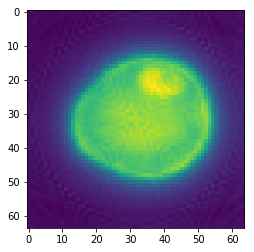

In [33]:
plt.imshow(cur_x.reshape(64, 64))
plt.show()

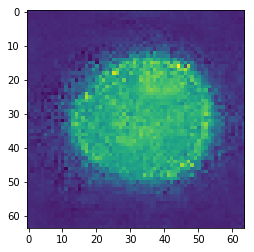

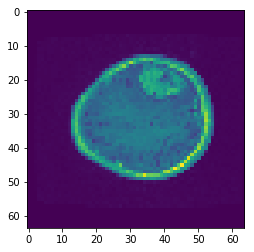

In [34]:
plt.imshow(cur_x_nn.reshape(64, 64))
plt.show()
plt.imshow(image_to_reconstruct)
plt.show()

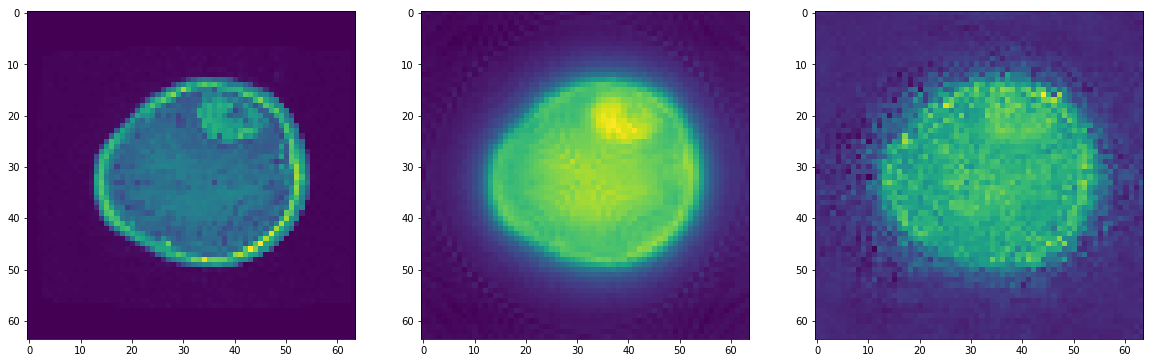

In [35]:
fig=plt.figure(figsize=(20, 20))
fig.add_subplot(1, 3, 1)
plt.imshow(image_to_reconstruct)
fig.add_subplot(1, 3, 2)
plt.imshow(cur_x)
fig.add_subplot(1, 3, 3)
plt.imshow(cur_x_nn)
plt.show()

In [36]:
print(cur_x[0])
print(cur_x_nn[0])
print(image_to_reconstruct[0])


[[ 50.95623031  57.81719148  39.38678565  35.05229223  55.72070209
   43.88195516  30.41211668  50.11867451  39.17851268  39.34303574
   56.15941431  46.12510284  36.91725732  51.15014034  42.29650793
   57.66471501  38.7103449   59.88660106  37.15604901  66.29059388
   69.97308404  42.83601643  68.64225317  90.82939001  47.95248213
   52.41947291  77.51939218 101.25698127  91.84187198  81.3285178
   61.50099512  43.62772011  50.59562062  75.31209189  85.12790096
  102.11930248 104.93525378  79.77310162  73.18203708  76.01449828
   97.74993234  79.40654017  75.00507508  70.37860103  85.46360016
   52.96943684  81.686312    70.28497827  66.32308137  60.73992818
   59.81999783  52.69839829  65.25914553  49.94557514  64.61540503
   52.76227499  68.6022303   71.65950311  49.00972708  52.1174212
   56.95723222  69.26429469  58.75067421  67.99860064]]
[[ 20.31524639  29.61645686  22.72546977  28.26367285   2.90148553
   19.42322365  -2.2205266    8.25911926   3.64836246  11.13327933
   12.01